# Exploração dados COVID-19 em Portugal

## Carregar dados com pandas
Fonte: https://github.com/dssg-pt/covid19pt-data

In [1]:
import pandas as pd

DATA_FILEPATH = "https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv"
MEASURES_FILEPATH = "https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/extra/medidas_governamentais/medidas_governamentais.csv"

data_df = pd.read_csv(DATA_FILEPATH, index_col=[0])
data_df = data_df.fillna(value=0) # troca NaN por 0

measures_df = pd.read_csv(MEASURES_FILEPATH, header=None, names = ['data' , 'medida'], index_col=[0])

### Estrutura dos dados

In [2]:
data_df.tail(3)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
data,,,,,,,,,,,,,,,,,,,,,
28-04-2020,28-04-2020 00:00,24322,14702,3289,5593,201,330,121,86,0.0,...,7.0,20.0,30.0,53.0,75.0,112.0,362.0,279.0,479.0,469.0
29-04-2020,29-04-2020 00:00,24505,14715,3340,5695,214,330,125,86,0.0,...,7.0,21.0,31.0,55.0,78.0,113.0,375.0,283.0,496.0,477.0
30-04-2020,30-04-2020 00:00,25045,15090,3389,5815,207,331,127,86,0.0,...,8.0,21.0,31.0,56.0,81.0,114.0,380.0,288.0,505.0,484.0


In [3]:
measures_df.tail(3)

,medida
data,
19-03-2020,Governo define limitações de deslocação e inic...
22-03-2020,Governo determina manutenção do funcionamento ...
23-03-2020,"Ministra da Cultura, Graça Fonseca, afirmou qu..."


### Imports para gráficos

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
import numpy as np

### Gráfico com estatísticas gerais

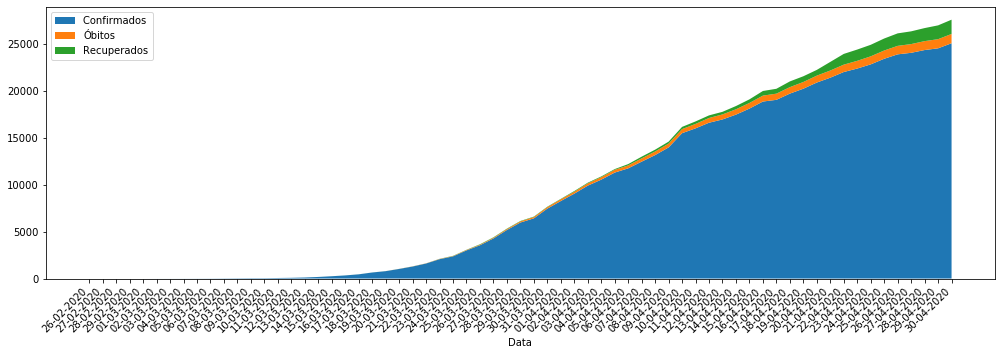

In [26]:
x = data_df.index
y1 = data_df.confirmados
y2 = data_df.obitos
y3 = data_df.recuperados

y = np.vstack([y1, y2, y3])

labels = ["Confirmados ", "Óbitos", "Recuperados"]

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.xlabel("Data")

ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

### Gráfico com medidas governamentais

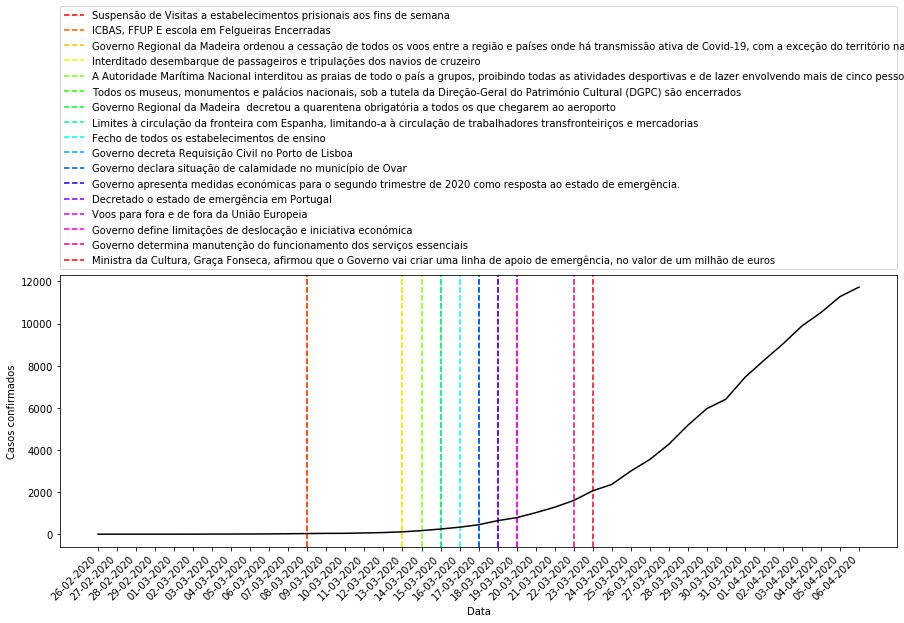

In [99]:
import datetime
from dateutil.relativedelta import relativedelta

# dias que aparecem depois do último evento
days_after = 14
last_date_str = measures_df.last_valid_index()
date = datetime.datetime.strptime(last_date_str, '%d-%m-%Y')
date = date + relativedelta(days=days_after)
date_str = date.strftime("%d-%m-%Y")


df = data_df[:date_str] 

x = df.index
y = df.confirmados

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.xlabel("Data")
plt.ylabel("Casos confirmados")
plt.plot(x,y, color="black")

labels = measures_df.medida.tolist()
xm = measures_df.index.tolist()

cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, len(xm))]
for l, d, c in zip(labels, xm, colors):
    ax.vlines(d, 0, 1, transform=ax.get_xaxis_transform(), colors=c, linestyles='dashed', label=l)


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=1, mode="expand", borderaxespad=0.)
plt.show()

### Gráfico de distribuição de óbitos

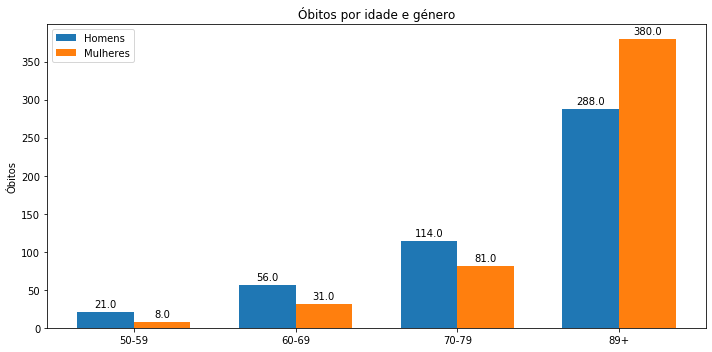

In [28]:
df = data_df.tail(1) # dados mais recentes

labels = ['50-59', '60-69', '70-79', '89+']
men = [df.obitos_50_59_m.iat[0], df.obitos_60_69_m.iat[0], df.obitos_70_79_m.iat[0], df.obitos_80_plus_m.iat[0]]
women = [df.obitos_50_59_f.iat[0], df.obitos_60_69_f.iat[0], df.obitos_70_79_f.iat[0], df.obitos_80_plus_f.iat[0]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

rects1 = ax.bar(x - width/2, men, width, label='Homens')
rects2 = ax.bar(x + width/2, women, width, label='Mulheres')

ax.set_ylabel('Óbitos')
ax.set_title('Óbitos por idade e género')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Ligação ao QGIS 

In [1]:
from osgeo import ogr
from qgis.core import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()

print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/CarlosPeixotoAntunes/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/CarlosPeixotoAntunes/AppData/Roaming/python3\profiles\default/qgis-auth.db



### Carregar GeoPackage
Fonte: https://github.com/jgrocha/covid-pt     

In [2]:
covid_gpkg = "covid-pt-latest.gpkg" 
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer concelho loaded
Layer distrito loaded
Layer raa_central_concelho loaded
Layer raa_central_ilha loaded
Layer raa_ocidental_concelho loaded
Layer raa_ocidental_ilha loaded
Layer raa_oriental_concelho loaded
Layer raa_oriental_ilha loaded
Layer ram_concelho loaded
Layer ram_ilha loaded
Layer layer_styles loaded
Layer confirmados_concelho loaded
Layer confirmados_distrito_ilha loaded
Layer situacao_epidemiologica loaded


### Concelhos com mais casos confirmados

In [3]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]

def confirmados(c):
    con = c["confirmados_concelho_mais_recente"]
    if con == NULL:
        con = 0
    return (c["concelho"], con)

lista = list(map(confirmados, concelho.getFeatures()))
lista.sort(reverse = True, key = lambda c : c[1])

N = 10
print('Concelho -> Casos confirmados')
print('-----------------------------')
for c in lista[:N]:
    print(c[0],' -> ',c[1])

Concelho -> Casos confirmados
-----------------------------
LISBOA  ->  1413
VILA NOVA DE GAIA  ->  1263
PORTO  ->  1211
BRAGA  ->  1019
MATOSINHOS  ->  1017
GONDOMAR  ->  966
MAIA  ->  826
VALONGO  ->  700
SINTRA  ->  568
OVAR  ->  564


### Função para converter layer para imagem

In [33]:
import io

def layerToImageByteArray(name, width, height = 1):

    layer = QgsProject.instance().mapLayersByName(name)[0]
    
    xt = layer.extent()
    if height == 1:
        height = int(width*xt.height()/xt.width())
    print("Layer: {} ({},{})".format(layer.name(),width, height))
    
    options = QgsMapSettings()
    options.setLayers([layer])
    options.setBackgroundColor(QColor(255, 255, 255))
    options.setOutputSize(QSize(width, height))
    options.setExtent(xt)

    render = QgsMapRendererParallelJob(options)
    render.start()
    render.waitForFinished()

    image = render.renderedImage()

    imgbuf = QBuffer()
    imgbuf.open( QIODevice.ReadWrite )
    image.save( imgbuf,"PNG" )

    return imgbuf.data()

### Funções para edição de imagens

In [48]:
from PIL import Image

# junta imagens horizontalmente
def mergeImagesH(images):

    images = [Image.open(io.BytesIO(x)) for x in images]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0

    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    imgByteArr = io.BytesIO()
    new_im.save(imgByteArr, format='PNG')
    return imgByteArr.getvalue()    

# dá crop a uma imagem movendo o ponto inferior direito
def cropImage(image, right, bottom):
    image = Image.open(io.BytesIO(image))

    w, h = image.size
    
    image = image.crop((0, 0, w-right, h-bottom)) # left, up, right, bottom
    
    imgByteArr = io.BytesIO()
    image.save(imgByteArr, format='PNG')
    return imgByteArr.getvalue()    

### Mapas do número de casos confirmados por concelho em Portugal

In [20]:
from IPython.display import Image as PImage

Layer: concelho (200,409)


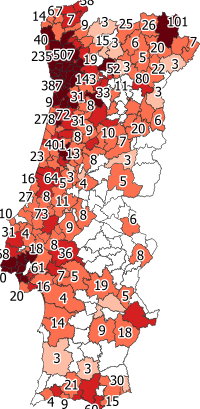

In [56]:
concelho = layerToImageByteArray('concelho', 200)

PImage(concelho)

Layer: ram_concelho (400,1058)


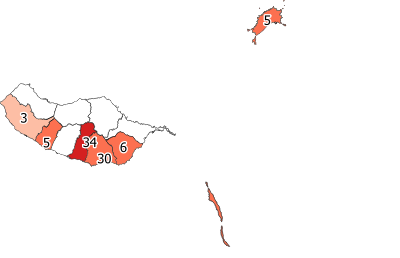

In [55]:
ram_concelho = layerToImageByteArray('ram_concelho', 400)

img = cropImage(ram_concelho, 0, 800)

PImage(img)                    

Layer: raa_ocidental_concelho (200,200)
Layer: raa_central_concelho (200,200)
Layer: raa_oriental_concelho (200,200)


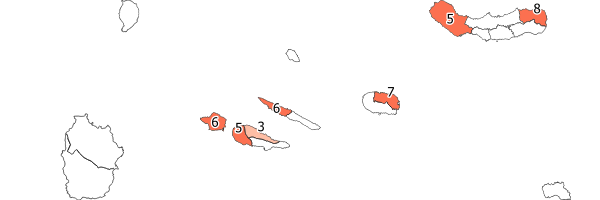

In [47]:
raa_ocidental_concelho = layerToImageByteArray('raa_ocidental_concelho', 200, 200)
raa_central_concelho = layerToImageByteArray('raa_central_concelho', 200, 200)
raa_oriental_concelho = layerToImageByteArray('raa_oriental_concelho', 200, 200)

img = mergeImagesH([raa_ocidental_concelho, raa_central_concelho, raa_oriental_concelho])

PImage(img)

In [ ]:
qgs.exitQgis()